# Introduction
The Top 2000 is a ranking of songs, made up each year out of votes from the Dutch public. The annual list is broadcasted on the radio in the last days of December. It is as of last December also recognized as intangible Dutch heritage. It however rarely changes rankings and my assumptions were that it was heavily predictable by previous years as well as the fact if the artist died the past year. The following research question was conducted: "To what extent do past rankings and year of decease of the artist influence next year's top 2000?" 

My tested hypothesis is: The Top 2000 can be predicted for at least 75% based on the ranking of previous years and the year the artist died.



# Data cleaning
### Import existing data
data was downloaded as seperate xlsx files via https://www.nporadio2.nl/top2000,
converted to csv in excel files to load into the notebook:

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import math
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df99 = pd.read_csv('./TOP-2000-1999.csv', sep=';')
df0 = pd.read_csv('./TOP-2000-2000.csv', sep=';')
df1 = pd.read_csv('./TOP-2000-2001.csv', sep=';')
df2 = pd.read_csv('./TOP-2000-2002.csv', sep=';')
df3 = pd.read_csv('./TOP-2000-2003.csv', sep=';')
df4 = pd.read_csv('./TOP-2000-2004.csv', sep=';')
df5 = pd.read_csv('./TOP-2000-2005.csv', sep=';')
df6 = pd.read_csv('./TOP-2000-2006.csv', sep=';')
df7 = pd.read_csv('./TOP-2000-2007.csv', sep=';')
df8 = pd.read_csv('./TOP-2000-2008.csv', sep=';')
df9 = pd.read_csv('./TOP-2000-2009.csv', sep=';')
df10 = pd.read_csv('./TOP-2000-2010.csv', sep=';')
df11 = pd.read_csv('./TOP-2000-2011.csv', sep=';')
df12 = pd.read_csv('./TOP-2000-2012.csv', sep=';')
df13 = pd.read_csv('./TOP-2000-2013.csv', sep=';')
df14 = pd.read_csv('./TOP-2000-2014.csv', sep=';')
df15 = pd.read_csv('./TOP-2000-2015.csv', sep=';')
df16 = pd.read_csv('./TOP-2000-2016.csv', sep=';')
df17 = pd.read_csv('./TOP-2000-2017.csv', sep=';')
df18 = pd.read_csv('./TOP-2000-2018.csv', sep=';')
df19 = pd.read_csv('./TOP-2000-2019.csv', sep=';')
df19.head()

2019               titel       artiest  jaar
0     1   Bohemian Rhapsody         Queen  1975
1     2    Hotel California        Eagles  1977
2     3           Piano Man    Billy Joel  1974
3     4      Roller Coaster    Danny Vera  2019
4     5  Stairway To Heaven  Led Zeppelin  1971

### Combining the top 2000's and cleaning
To use the data it has to be combined into one dataset. 
Some column names were still in Dutch and had to be changed. 

In [20]:
#make df which will later be used to sort all data in
df = df99

 #re-sort columns
columns_sorted = ['titel','artiest','jaar','1999']

df = df.reindex(columns=columns_sorted)

#import reduce function
from functools import reduce

#array of all dataframes
dataframes_all = [df,df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19]

#reducer works like a loop, outer merge will fill dataframe with all songs that were ever in any of the top2000's. 
#If it has no score in one year it will be filled with NaN
df = reduce(lambda x, y: x.merge(y, how="outer"), dataframes_all)

#resulting df of all songs that made the list on annual basis, show random sequence in the middle
df.loc[300:310]

titel                             artiest  jaar  \
300       Papa Was A Rolling Stone                         Temptations  1972   
301             Mr. Tambourine Man                               Byrds  1965   
302                Bad Moon Rising        Creedence Clearwater Revival  1969   
303                 MacArthur Park                      Richard Harris  1968   
304                More Than Words                             Extreme  1991   
305     You're The One That I Want  John Travolta & Olivia Newton John  1978   
306              Land Of Confusion                             Genesis  1986   
307         Woorden Zonder Woorden                             De Kast  1998   
308                   Baker Street                      Gerry Rafferty  1978   
309  Stay With Me Till The Morning                         Vicky Brown  1986   
310       Everytime I Think Of You                               Babys  1979   

      1999   2000   2001   2002    2003    2004    2005  ...    2010    2011  \
300  301.0  330.0  304.0  296.0   294.0   265.0   236.0  ...   337.0   305.0   
301  302.0  277.0  323.0  324.0   349.0   281.0   365.0  ...   485.0   707.0   
302  303.0  208.0  250.0  201.0   302.0   255.0   263.0  ...   218.0   287.0   
303  304.0  441.0  350.0  193.0   334.0   410.0   323.0  ...   651.0   804.0   
304  305.0  514.0  661.0  581.0   503.0   767.0   988.0  ...   823.0  1198.0   
305  306.0  474.0  812.0  876.0  1293.0  1045.0  1290.0  ...  1938.0     NaN   
306  307.0  299.0  297.0  282.0   388.0   423.0   645.0  ...   586.0   613.0   
307  308.0    NaN  292.0  421.0  1059.0  1148.0  1121.0  ...  1001.0  1311.0   
308  309.0  421.0  384.0  473.0   532.0   539.0   427.0  ...   726.0   396.0   
309  310.0  681.0  267.0  822.0   628.0   538.0   708.0  ...   614.0   811.0   
310  311.0  172.0  186.0  175.0   304.0   234.0   336.0  ...   399.0   490.0   

       2012    2013    2014    2015    2016    2017    2018    2019  
300   329.0   299.0   318.0   375.0   474.0   504.0   487.0     NaN  
301  1512.0  1009.0  1310.0  1720.0  1345.0  1586.0     NaN     NaN  
302   229.0   325.0   369.0   342.0   284.0   285.0   244.0   226.0  
303   550.0   835.0   949.0  1128.0  1631.0  1570.0  1796.0  1696.0  
304     NaN  1312.0  1104.0  1065.0  1225.0  1116.0  1421.0  1447.0  
305  1835.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
306   641.0   481.0   568.0   561.0   552.0   559.0   712.0   775.0  
307  1549.0  1856.0     NaN     NaN     NaN     NaN     NaN     NaN  
308   330.0   349.0   298.0   374.0   448.0   449.0   514.0   550.0  
309  1265.0  1313.0  1122.0  1371.0     NaN     NaN     NaN     NaN  
310   608.0   755.0   492.0   539.0   521.0   520.0  1541.0     NaN  

[11 rows x 24 columns]

The resulting dataframe is sorted by years, each row representing a song. The rating however is now a float instead of an integer because parts of it are filled with NaN. Replacing the NaN with numbers will offer the possibility to return the values to integers, as I would prefer. However, the Random Forest algorithm will be highly influenced by the 'fake rankings' which results in a worse outcome. Therefore all NaN are dropped so the model does not have to deal with fake rankings.

In [21]:
df = df.dropna()

# #columns that need to be integers
cols = ['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

# #loop through them
for col in cols:
    #make each column exist of integers
   df[col] = df[col].astype('int')

# #rename to english column names
df = df.rename(columns={"titel": "title", "artiest": "artist", "jaar": "released_year"})

# #check if it worked
df.tail(10)

title                    artist  released_year  \
1076        Skandal Im Sperrbezirk        Spider Murphy Gang           1982   
1081     Midnight Train To Georgia  Gladys Knight & The Pips           1973   
1142               Smooth Operator                      Sade           1984   
1162         Does Your Mother Know                      ABBA           1979   
1175       Verdammt Ich Lieb' Dich             Matthias Reim           1990   
1282                     The Joker         Steve Miller Band           1973   
1285                        Sylvia                     Focus           1972   
1324           A Thing Called Love               Johnny Cash           1972   
1354  Stuck In The Middle With You            Stealers Wheel           1973   
1999   Thank God I'm A Country Boy               John Denver           1975   

      1999  2000  2001  2002  2003  2004  2005  ...  2010  2011  2012  2013  \
1076  1077  1291  1097  1192  1326  1319  1544  ...  1834  1954  1494  1667   
1081  1082  1724  1407  1644  1635  1299  1414  ...  1183  1185  1516  1343   
1142  1143  1043  1008  1093   947  1155  1269  ...   863   888   935  1031   
1162  1163   882  1027  1051  1020  1069   825  ...   981  1141  1089  1410   
1175  1176  1477  1278  1156   888  1320  1330  ...  1271  1383  1222  1282   
1282  1283   869  1123  1034  1414  1064  1529  ...  1091  1151  1354  1399   
1285  1286   970   649   842   583   808  1018  ...   785   921  1049   997   
1324  1325  1240  1299  1642   842  1420  1474  ...  1063  1040   698   862   
1354  1355  1047  1107  1186  1348  1013  1181  ...  1334  1195  1195   934   
1999  2000   737  1226  1262  1179  1303  1031  ...  1512  1479  1675  1657   

      2014  2015  2016  2017  2018  2019  
1076  1686  1532  1706  1714  1687  1624  
1081  1377  1340  1406  1270  1055  1320  
1142   715   811   837   753   993  1077  
1162  1262  1168   759   737   602   560  
1175  1359  1282  1483  1425  1279  1264  
1282  1734  1835  1544  1458  1727  1714  
1285  1177  1392  1504  1394  1988  1788  
1324  1199  1232  1630  1544  1263  1227  
1354  1304  1228  1133  1224  1269  1252  
1999  1704  1530  1460  1879  1499  1234  

[10 rows x 24 columns]

### Adding data on deceased artists
My hypothesis included that the death of an artist will influence the ranking as well as the ranking of previous years.
The data of deceased artists was scraped from https://findadeath.com/the-directory/

In [22]:
page = requests.get("https://findadeath.com/the-directory/")
soup = BeautifulSoup(page.content, 'html.parser')

#print soup for readability of assignment on github commented out
#soup

In [5]:
people_array = []
people = soup.find_all("tr")
for single in people:
    #check if there are more than 1 td (so there is a person inside)
    if(len(single.find_all('td'))>1):
        #save person seperately
        person = {
          "artist": single.find_all('td')[0].get_text(),
          "decease_date": single.find_all('td')[1].get_text(),
        }
        #only save person who is truly a human (>1 letters in name)
        if(len(person['artist'])>1):
            #filter out groups of people
            if(len(person['decease_date'])>4):
                #save decease date with just dying date
                person['decease_date'] = person['decease_date'].split('– ')[1]
                #some dates were contaminated with characters other than numbers
                person['decease_date'] = person['decease_date'].replace("\n", "")
                #save both years and date it has been seperately to look for difference in correlation
                person['decease_year'] = person['decease_date']
                person['decease_date'] = -(2019 - int(person['decease_date']))
                people_array.append(person)
dfDeaths = pd.DataFrame(people_array)

dfDeaths.loc[200:250]

artist  decease_date decease_year
200                        James Whale           -62         1957
201                       Jane Russell            -8         2011
202                        Janet Leigh           -15         2004
203                       Janis Joplin           -49         1970
204                        Jay Stewart           -30         1989
205                    Jayne Mansfield           -52         1967
206  Jeanine “The Singing Nun” Deckers           -34         1985
207                     Jeffrey Dahmer           -25         1994
208                  Jennifer Paterson           -20         1999
209                      Jennifer Syme           -18         2001
210                Jerome Curly Howard           -67         1952
211        Jeron Charles Criswell King           -37         1982
212                    Jessica Savitch           -36         1983
213                         Jill Dando           -20         1999
214                       Jim Morrison           -48         1971
215                       Jimi Hendrix           -49         1970
216                      Jimmy Durante           -39         1980
217                      Jimmy Stewart           -22         1997
218                      Joan Crawford           -42         1977
219                       Joe DiMaggio           -20         1999
220                          Joe Orton           -52         1967
221                       John Belushi           -37         1982
222                         John Candy           -25         1994
223                        John Cazale           -41         1978
224                      John DeLorean           -14         2005
225                        John Denver           -22         1997
226                        John Holmes           -21         1998
227                   John Kennedy Jr.           -20         1999
228                        John Lennon           -39         1980
229    John “The Elephant Man” Merrick          -129         1890
230                      John Phillips           -18         2001
231                        John Ritter           -16         2003
232                         John Wayne           -40         1979
233                      Johnny Arthur           -68         1951
234                      Johnny Carson           -14         2005
235                       Johnny Grant           -11         2008
236                      Johnny Ramone           -15         2004
237                     Jon-Erik Hexum           -35         1984
238                   Jonathan Brandis           -16         2003
239                       Judith Barsi           -31         1988
240                       Judy Garland           -50         1969
241                        Judy Mallet           -20         1999
242                         Judy Tyler           -62         1957
243                         Jules Roth           -21         1998
244                    Karen Carpenter           -36         1983
245                     Karen Silkwood           -45         1974
246            Karyn “Cookie” Kupcinet           -56         1963
247                   Kathleen Freeman           -18         2001
248                           Kay Kent           -30         1989
249                         Keith Moon           -41         1978
250                  Ken Atison Seiuli           -21         1998

# Resulting dataframe
Both dataframes of the top 2000 and the deceased artists dataframe have to be merged.

In [6]:
#merge left will focus on the top 2000's dataframe and keep all rows even if the band/artist is not deceased. This is optimal for the data I want to use.
df = pd.merge(df, dfDeaths, how='left')
#replacing NaN values with impossibly low score (99999)
df.fillna(0, inplace=True)
df['decease_date'] = df['decease_date'].astype('int')
df['decease_year'] = df['decease_year'].astype('int')
df.index.name = 'id'
df.head(10)

title             artist  released_year  1999  \
id                                                                            
0                 Bohemian Rhapsody              Queen           1975     1   
1                  Hotel California             Eagles           1977     2   
2                Stairway To Heaven       Led Zeppelin           1971     4   
3   Paradise By The Dashboard Light          Meat Loaf           1978     5   
4                           Imagine        John Lennon           1971     7   
5        Bridge Over Troubled Water  Simon & Garfunkel           1970     9   
6            A Whiter Shade Of Pale       Procol Harum           1967    10   
7           House Of The Rising Sun            Animals           1964    13   
8                  Goodnight Saigon         Billy Joel           1983    14   
9                     Dancing Queen               ABBA           1976    16   

    2000  2001  2002  2003  2004  2005  ...  2012  2013  2014  2015  2016  \
id                                      ...                                 
0      1     1     1     1     1     2  ...     1     1     2     2     1   
1      4     3     3     2     2     3  ...     2     2     1     3     2   
2      3     4     4     4     4     5  ...     3     3     3     5     3   
3      5     5     5     5     6     6  ...    19    22    17    30    27   
4      7    11    11    13     9    15  ...    22    23    38     1    12   
5     27    17    32    32    45    42  ...    38    38    48    59    52   
6     18    23    20    22    28    22  ...    61    83    98   105   119   
7     12     6     6     7     8     8  ...    51    55    78    84    71   
8     11     8    18    25    22    34  ...    80    90    83    79    77   
9     30    28    41    46    42    36  ...   111   160   127   155   131   

    2017  2018  2019  decease_date  decease_year  
id                                                
0      1     1     1             0             0  
1      2     2     2             0             0  
2      3     4     5             0             0  
3     27    29    35             0             0  
4     16    16    29           -39          1980  
5     58    61    82             0             0  
6    117   153   162             0             0  
7     77    86   103             0             0  
8     81    93   101             0             0  
9     92    67    68             0             0  

[10 rows x 26 columns]

In [7]:
#export to new csv
df.to_csv(r'./combined_top2000.csv')

# Data analysis
### Who of the top 2000 deceased? 
The barchart below shows which artists are dead and still in the top 2000 every year, and with how many songs.

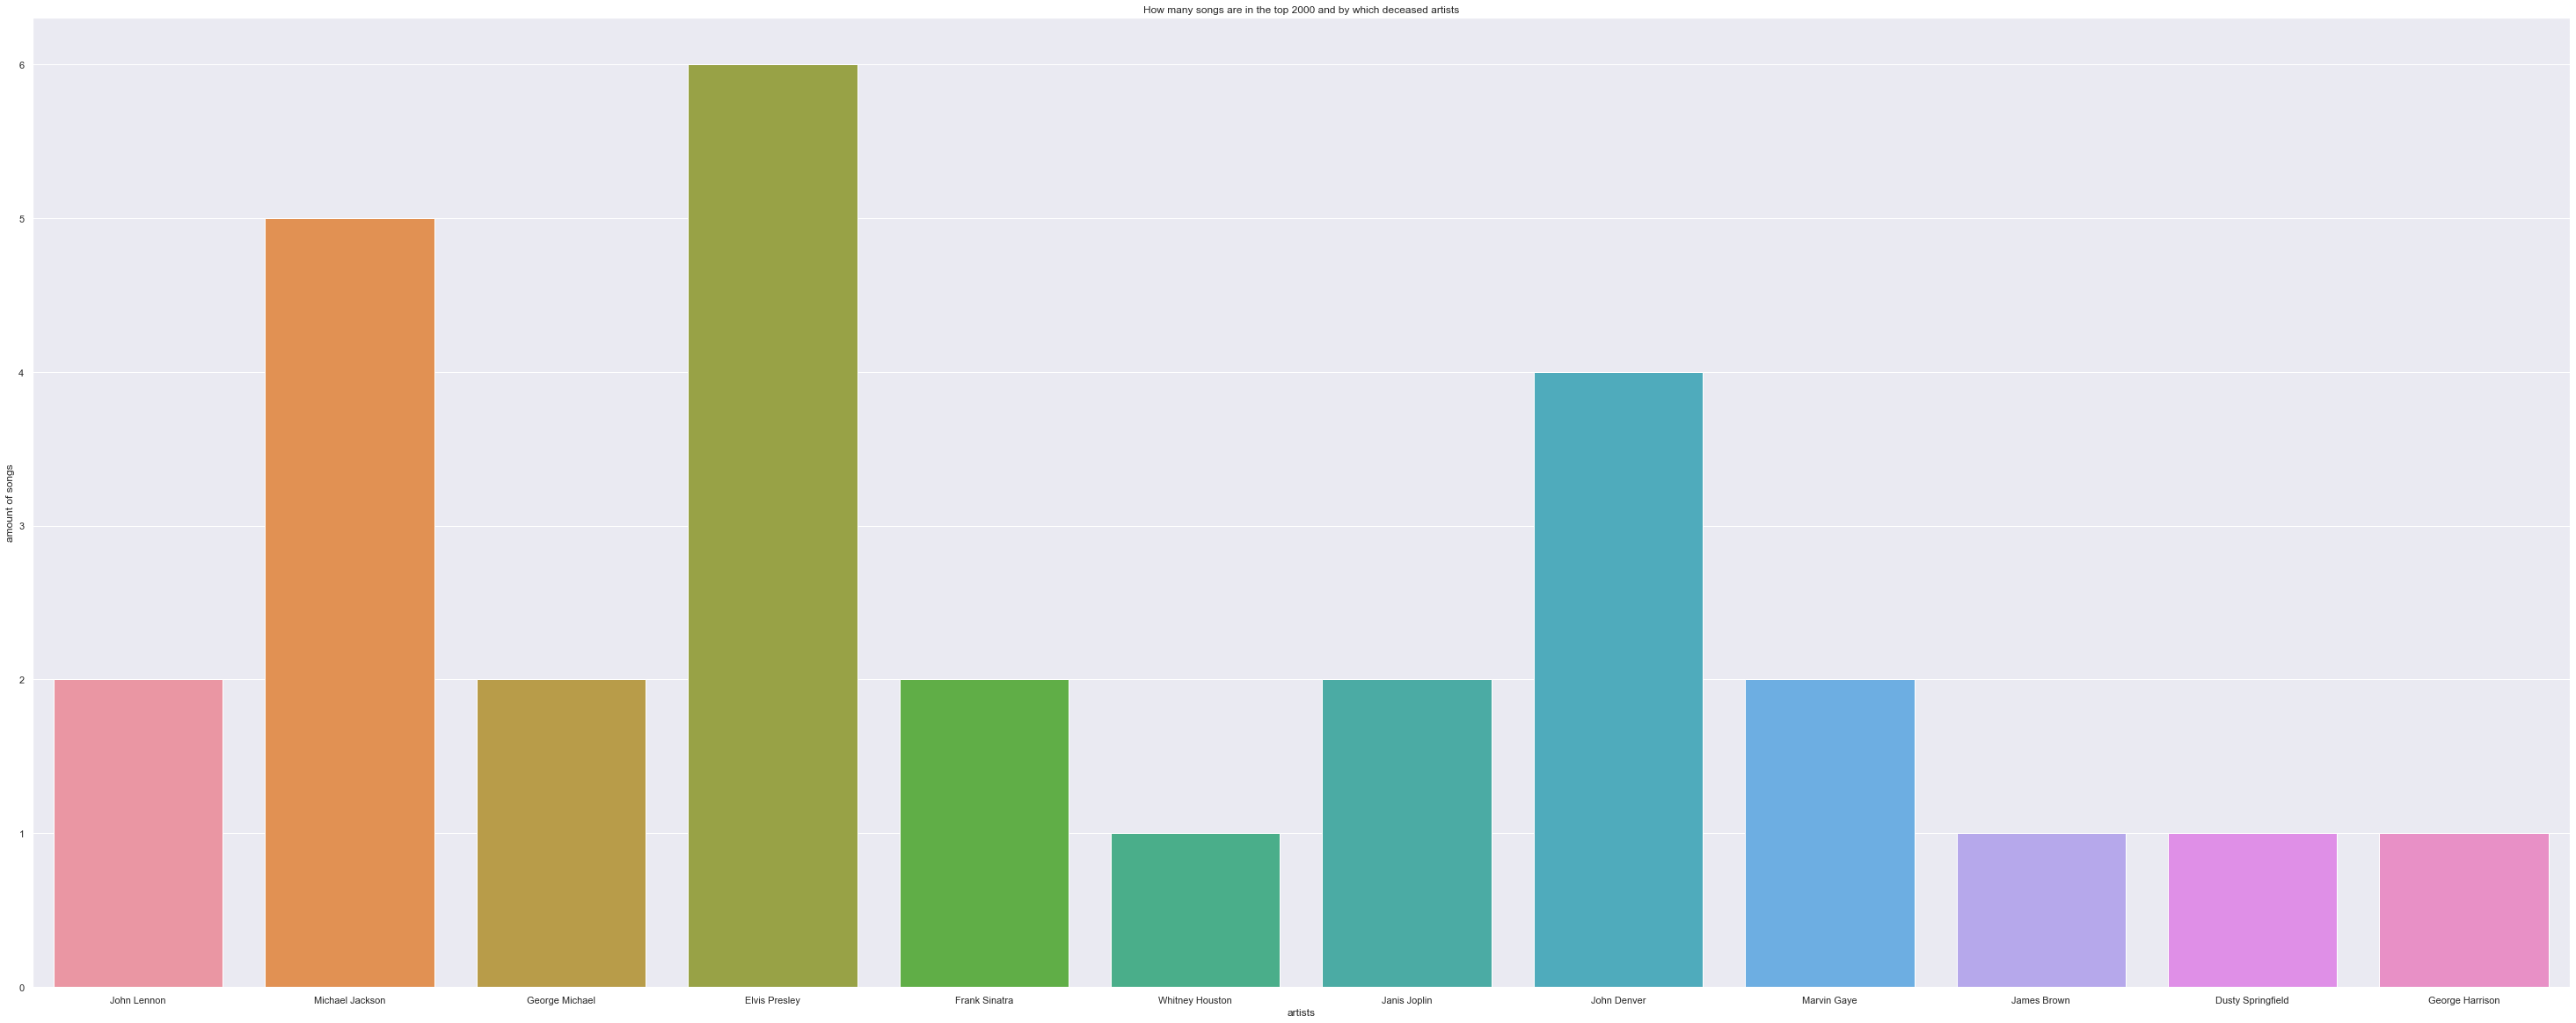

In [12]:
df_subset = df[(df["decease_year"]!=0)]
df_subset
sns.countplot(x="artist", data=df_subset)
plt.title('How many songs are in the top 2000 and by which deceased artists')
plt.xlabel("artists")
plt.ylabel("amount of songs")


sns.set(rc={'figure.figsize':(51.7,20.27)})

### Influence of death in past 20 years illustrated by Michael Jackson

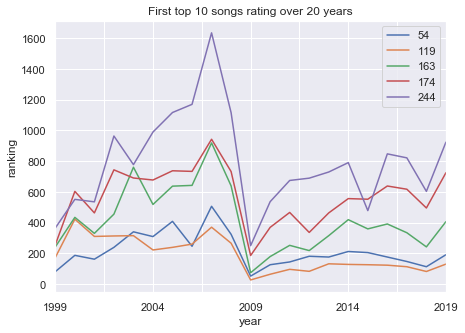

In [29]:
df_subset2 = df_subset[(df_subset["artist"]=="Michael Jackson")]
df_subset2 = df_subset2.transpose()
df_subset2 = df_subset2.drop(['title', 'artist', 'released_year', 'decease_date', 'decease_year'])

df_subset2.plot.line()
plt.title('First top 10 songs rating over 20 years')
plt.xlabel("year")
plt.ylabel("ranking")

sns.set(rc={'figure.figsize':(7.0,7.0)})

In [28]:
print( '54=', df.iloc[54]['title'],
' 119=', df.iloc[119]['title'],
' 163=', df.iloc[163]['title'],
' 174=', df.iloc[174]['title'],
' 244=', df.iloc[244]['title'])

54= Thriller  119= Billie Jean  163= Beat It  174= Ben  244= Heal The World


Michael Jackson passed away in 2009, as the immediate drop in the graph would suggest. This drop is the increase of ranking.

### How did the first top 10 ten songs perform the next 19 years?  

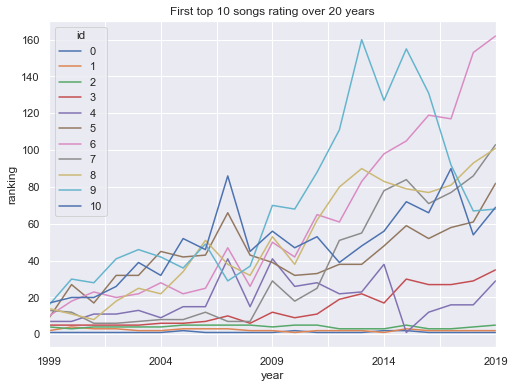

In [12]:
#switch rows and columns to make plotting line easier
df_t = df.head(11).transpose()

#only use the years and values from the years, drop all excessive columns
df_t = df_t.drop(['title', 'artist', 'released_year', 'decease_date', 'decease_year'])

df_t.plot.line()
plt.title('First top 10 songs rating over 20 years')
plt.xlabel("year")
plt.ylabel("ranking")

sns.set(rc={'figure.figsize':(8.0,8.0)})


As the plot below shows, the top 3 songs are very lineair, they hardly change ranking. 

### Which song changed ranking the most over the past 20 years? 

In [14]:
#put only years in the subset
df_subset = df.drop(['title', 'artist', 'released_year', 'decease_date', 'decease_year'], axis=1)

#differences is one list for each song, put inside a list
differences = np.diff(df_subset.values, axis=1)

total_difference = []
#loop over list of songs
for song in differences:
    diff = np.sum(np.abs(song))
    total_difference.append(diff)

#highest value in total difference
most_changed_song = np.where(total_difference == np.amax(total_difference))
most_changed_song = df.iloc[most_changed_song[0]]

#lowest value in total difference
least_changed_song = np.where(total_difference == np.amin(total_difference))
least_changed_song = df.iloc[least_changed_song[0]]
print(most_changed_song,least_changed_song)

                title                  artist  released_year  1999  2000  \
id                                                                         
378  Live And Let Die  Paul McCartney & Wings           1973   671  1506   

     2001  2002  2003  2004  2005  ...  2012  2013  2014  2015  2016  2017  \
id                                 ...                                       
378  1044  1264   946  1041  1530  ...  1336  1532  1768   679  1191  1333   

     2018  2019  decease_date  decease_year  
id                                           
378  1218  1423             0             0  

[1 rows x 26 columns]                 title artist  released_year  1999  2000  2001  2002  2003  \
id                                                                          
0   Bohemian Rhapsody  Queen           1975     1     1     1     1     1   

    2004  2005  ...  2012  2013  2014  2015  2016  2017  2018  2019  \
id              ...                                                   
0

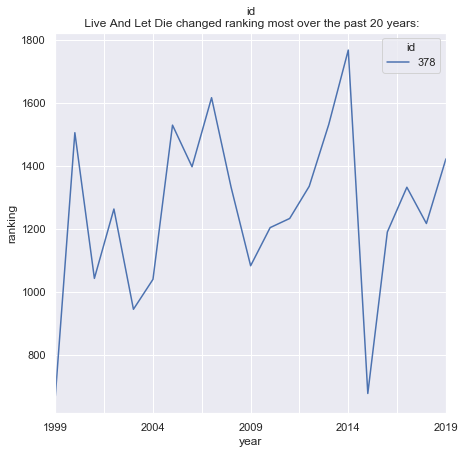

In [19]:
#switch rows and columns to make plotting line easier
df_t2 = most_changed_song.transpose()
title = most_changed_song['title'].to_string(index=False)
#only use the years and values from the years
df_t2 = df_t2.drop(['title', 'artist', 'released_year', 'decease_date', 'decease_year'])
df_t2.plot.line()
plt.title(f'{title} changed ranking most over the past 20 years:')
plt.xlabel("year")
plt.ylabel("ranking")

sns.set(rc={'figure.figsize':(7.0,7.0)})

### What songs had the highest and lowest mean ranking?

In [30]:
df_t2 = df.transpose()
df_t2 = df_t2.drop(['title', 'artist', 'released_year', 'decease_date', 'decease_year'])
means = df_t2.mean(axis = 0)
highestmean = np.amin(means)
lowestmean = np.amax(means)
lowestmeanid = np.where(means == lowestmean)
lowestid = lowestmeanid[0][0]
print('lowest mean:', lowestmean, 'highest mean', highestmean)

lowest mean: 1569.0 highest mean 1.1904761904761905


In [15]:
df.iloc[lowestid]

title            Skandal Im Sperrbezirk
artist               Spider Murphy Gang
released_year                      1982
1999                               1077
2000                               1291
2001                               1097
2002                               1192
2003                               1326
2004                               1319
2005                               1544
2006                               1781
2007                               1976
2008                               1602
2009                               1846
2010                               1834
2011                               1954
2012                               1494
2013                               1667
2014                               1686
2015                               1532
2016                               1706
2017                               1714
2018                               1687
2019                               1624
decease_date                          0



This indicates that _Bohemian Rhapsody_ is the song with the highest mean, 1.19. The song that is in the top 2000 every year but has the lowest mean is _Skandal Im Sperrbezirk_ by Spider Murphy Gang with a mean of 1569. 

# The model


In [17]:
pd.set_option('display.max_columns', 40)
df = pd.read_csv('./combined_top2000.csv')
df.head()

id                            title        artist  released_year  1999  \
0   0                Bohemian Rhapsody         Queen           1975     1   
1   1                 Hotel California        Eagles           1977     2   
2   2               Stairway To Heaven  Led Zeppelin           1971     4   
3   3  Paradise By The Dashboard Light     Meat Loaf           1978     5   
4   4                          Imagine   John Lennon           1971     7   

   2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  \
0     1     1     1     1     1     2     1     1     1     1     2     1   
1     4     3     3     2     2     3     3     3     2     2     1     2   
2     3     4     4     4     4     5     5     5     5     4     5     5   
3     5     5     5     5     6     6     7    10     6    12     9    11   
4     7    11    11    13     9    15    15    41    15    41    26    28   

   2012  2013  2014  2015  2016  2017  2018  2019  decease_date  decease_year  
0     1     1     2     2     1     1     1     1             0             0  
1     2     2     1     3     2     2     2     2             0             0  
2     3     3     3     5     3     3     4     5             0             0  
3    19    22    17    30    27    27    29    35             0             0  
4    22    23    38     1    12    16    16    29           -39          1980

In [18]:
#id is double and does not need to be taken into account in the correlation matrix as it has no influence on the outcome of ranking
df = df.drop('id', 1)
df.corr()

released_year      1999      2000      2001      2002  \
released_year       1.000000 -0.114394 -0.115367 -0.076198 -0.045339   
1999               -0.114394  1.000000  0.832207  0.792514  0.803234   
2000               -0.115367  0.832207  1.000000  0.863380  0.851879   
2001               -0.076198  0.792514  0.863380  1.000000  0.884414   
2002               -0.045339  0.803234  0.851879  0.884414  1.000000   
2003                0.003032  0.778144  0.811165  0.824748  0.911669   
2004               -0.001312  0.812919  0.827352  0.846358  0.911569   
2005                0.039107  0.773761  0.811520  0.830316  0.887030   
2006                0.047386  0.769686  0.775327  0.810811  0.859419   
2007                0.050556  0.744396  0.763686  0.783202  0.836904   
2008                0.025513  0.802796  0.826898  0.853035  0.908521   
2009                0.068195  0.722073  0.707549  0.767494  0.815429   
2010                0.084189  0.713398  0.706716  0.763605  0.816323   
2011                0.059406  0.717510  0.709129  0.747213  0.810878   
2012                0.031357  0.696845  0.675628  0.684041  0.758796   
2013                0.011666  0.694886  0.662452  0.676485  0.754307   
2014               -0.005975  0.684275  0.664120  0.689290  0.753648   
2015               -0.039323  0.690388  0.649650  0.677781  0.739102   
2016               -0.032140  0.662264  0.633249  0.648193  0.705722   
2017               -0.033255  0.665983  0.635755  0.648112  0.707416   
2018               -0.061440  0.635105  0.583245  0.595308  0.631555   
2019               -0.064808  0.630146  0.595962  0.606469  0.651180   
decease_date        0.218037 -0.042549 -0.086482 -0.099879 -0.119869   
decease_year       -0.140627  0.036328  0.112857  0.099228  0.126672   

                   2003      2004      2005      2006      2007      2008  \
released_year  0.003032 -0.001312  0.039107  0.047386  0.050556  0.025513   
1999           0.778144  0.812919  0.773761  0.769686  0.744396  0.802796   
2000           0.811165  0.827352  0.811520  0.775327  0.763686  0.826898   
2001           0.824748  0.846358  0.830316  0.810811  0.783202  0.853035   
2002           0.911669  0.911569  0.887030  0.859419  0.836904  0.908521   
2003           1.000000  0.919961  0.917475  0.898845  0.870423  0.938846   
2004           0.919961  1.000000  0.946312  0.932952  0.917295  0.967934   
2005           0.917475  0.946312  1.000000  0.962882  0.943377  0.982156   
2006           0.898845  0.932952  0.962882  1.000000  0.952910  0.982822   
2007           0.870423  0.917295  0.943377  0.952910  1.000000  0.969708   
2008           0.938846  0.967934  0.982156  0.982822  0.969708  1.000000   
2009           0.852998  0.884408  0.894544  0.911841  0.877469  0.909460   
2010           0.850383  0.879548  0.890307  0.913036  0.893099  0.912075   
2011           0.839415  0.886698  0.889526  0.907132  0.890615  0.907263   
2012           0.792199  0.812623  0.817981  0.841539  0.820194  0.838771   
2013           0.771745  0.804146  0.797269  0.821233  0.797425  0.819931   
2014           0.771286  0.793950  0.793015  0.814583  0.784689  0.813714   
2015           0.762338  0.790405  0.783136  0.799964  0.777858  0.802755   
2016           0.714279  0.754902  0.735874  0.749774  0.738811  0.758259   
2017           0.714244  0.743733  0.731060  0.743477  0.726834  0.751551   
2018           0.641056  0.679272  0.666281  0.683582  0.668581  0.687102   
2019           0.652821  0.688536  0.680359  0.699179  0.679712  0.700314   
decease_date  -0.043936 -0.044410 -0.002175  0.006484 -0.018016 -0.024549   
decease_year   0.074406  0.074499  0.046050  0.020684  0.053056  0.056000   

                   2009      2010      2011      2012      2013      2014  \
released_year  0.068195  0.084189  0.059406  0.031357  0.011666 -0.005975   
1999           0.722073  0.713398  0.717510  0.696845  0.694886  0.684275   
2000           0.707549  0.706716  0.709129  0.675628  0.

This correlation matrix shows that the most correlating variables to our dependent variable (2019) are (in descending order): 2018, 2017, 2016, 2015, 2014, 2013. What is noticeable is that the ranking in 1999 has more correlation than both 2000 and 2001. To avoid overfitting we will only use 6 independant variables for our model.

### What years have a big correlation to the years that followed it? 

In [19]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of sol series is the pair with the bigest correlation
sol.head(40)

2006  2008    0.982822
2005  2008    0.982156
2018  2019    0.974858
2016  2017    0.971145
2007  2008    0.969708
2004  2008    0.967934
2013  2014    0.964872
2005  2006    0.962882
2010  2011    0.961506
2009  2010    0.957712
2012  2013    0.957095
2014  2015    0.956845
2006  2007    0.952910
2013  2015    0.952670
2009  2011    0.950275
2015  2016    0.948949
2004  2005    0.946312
2005  2007    0.943377
2003  2008    0.938846
2015  2017    0.935687
2004  2006    0.932952
2012  2014    0.930665
2014  2016    0.929231
2012  2015    0.927655
2017  2018    0.927396
2011  2012    0.926193
      2013    0.925333
2013  2016    0.924118
2014  2017    0.922519
2003  2004    0.919961
2016  2018    0.917737
2003  2005    0.917475
2004  2007    0.917295
2017  2019    0.916198
2013  2017    0.915905
2006  2010    0.913036
2008  2010    0.912075
2006  2009    0.911841
2002  2003    0.911669
      2004    0.911569
dtype: float64

This list shows the 30 highest correlations, including the $0.97$ correlation of 2004 and 2008 which is remarkeably high considering the gap in years. 2008 seems to be the most easily predictable as it correlates very highly to its prior years. 

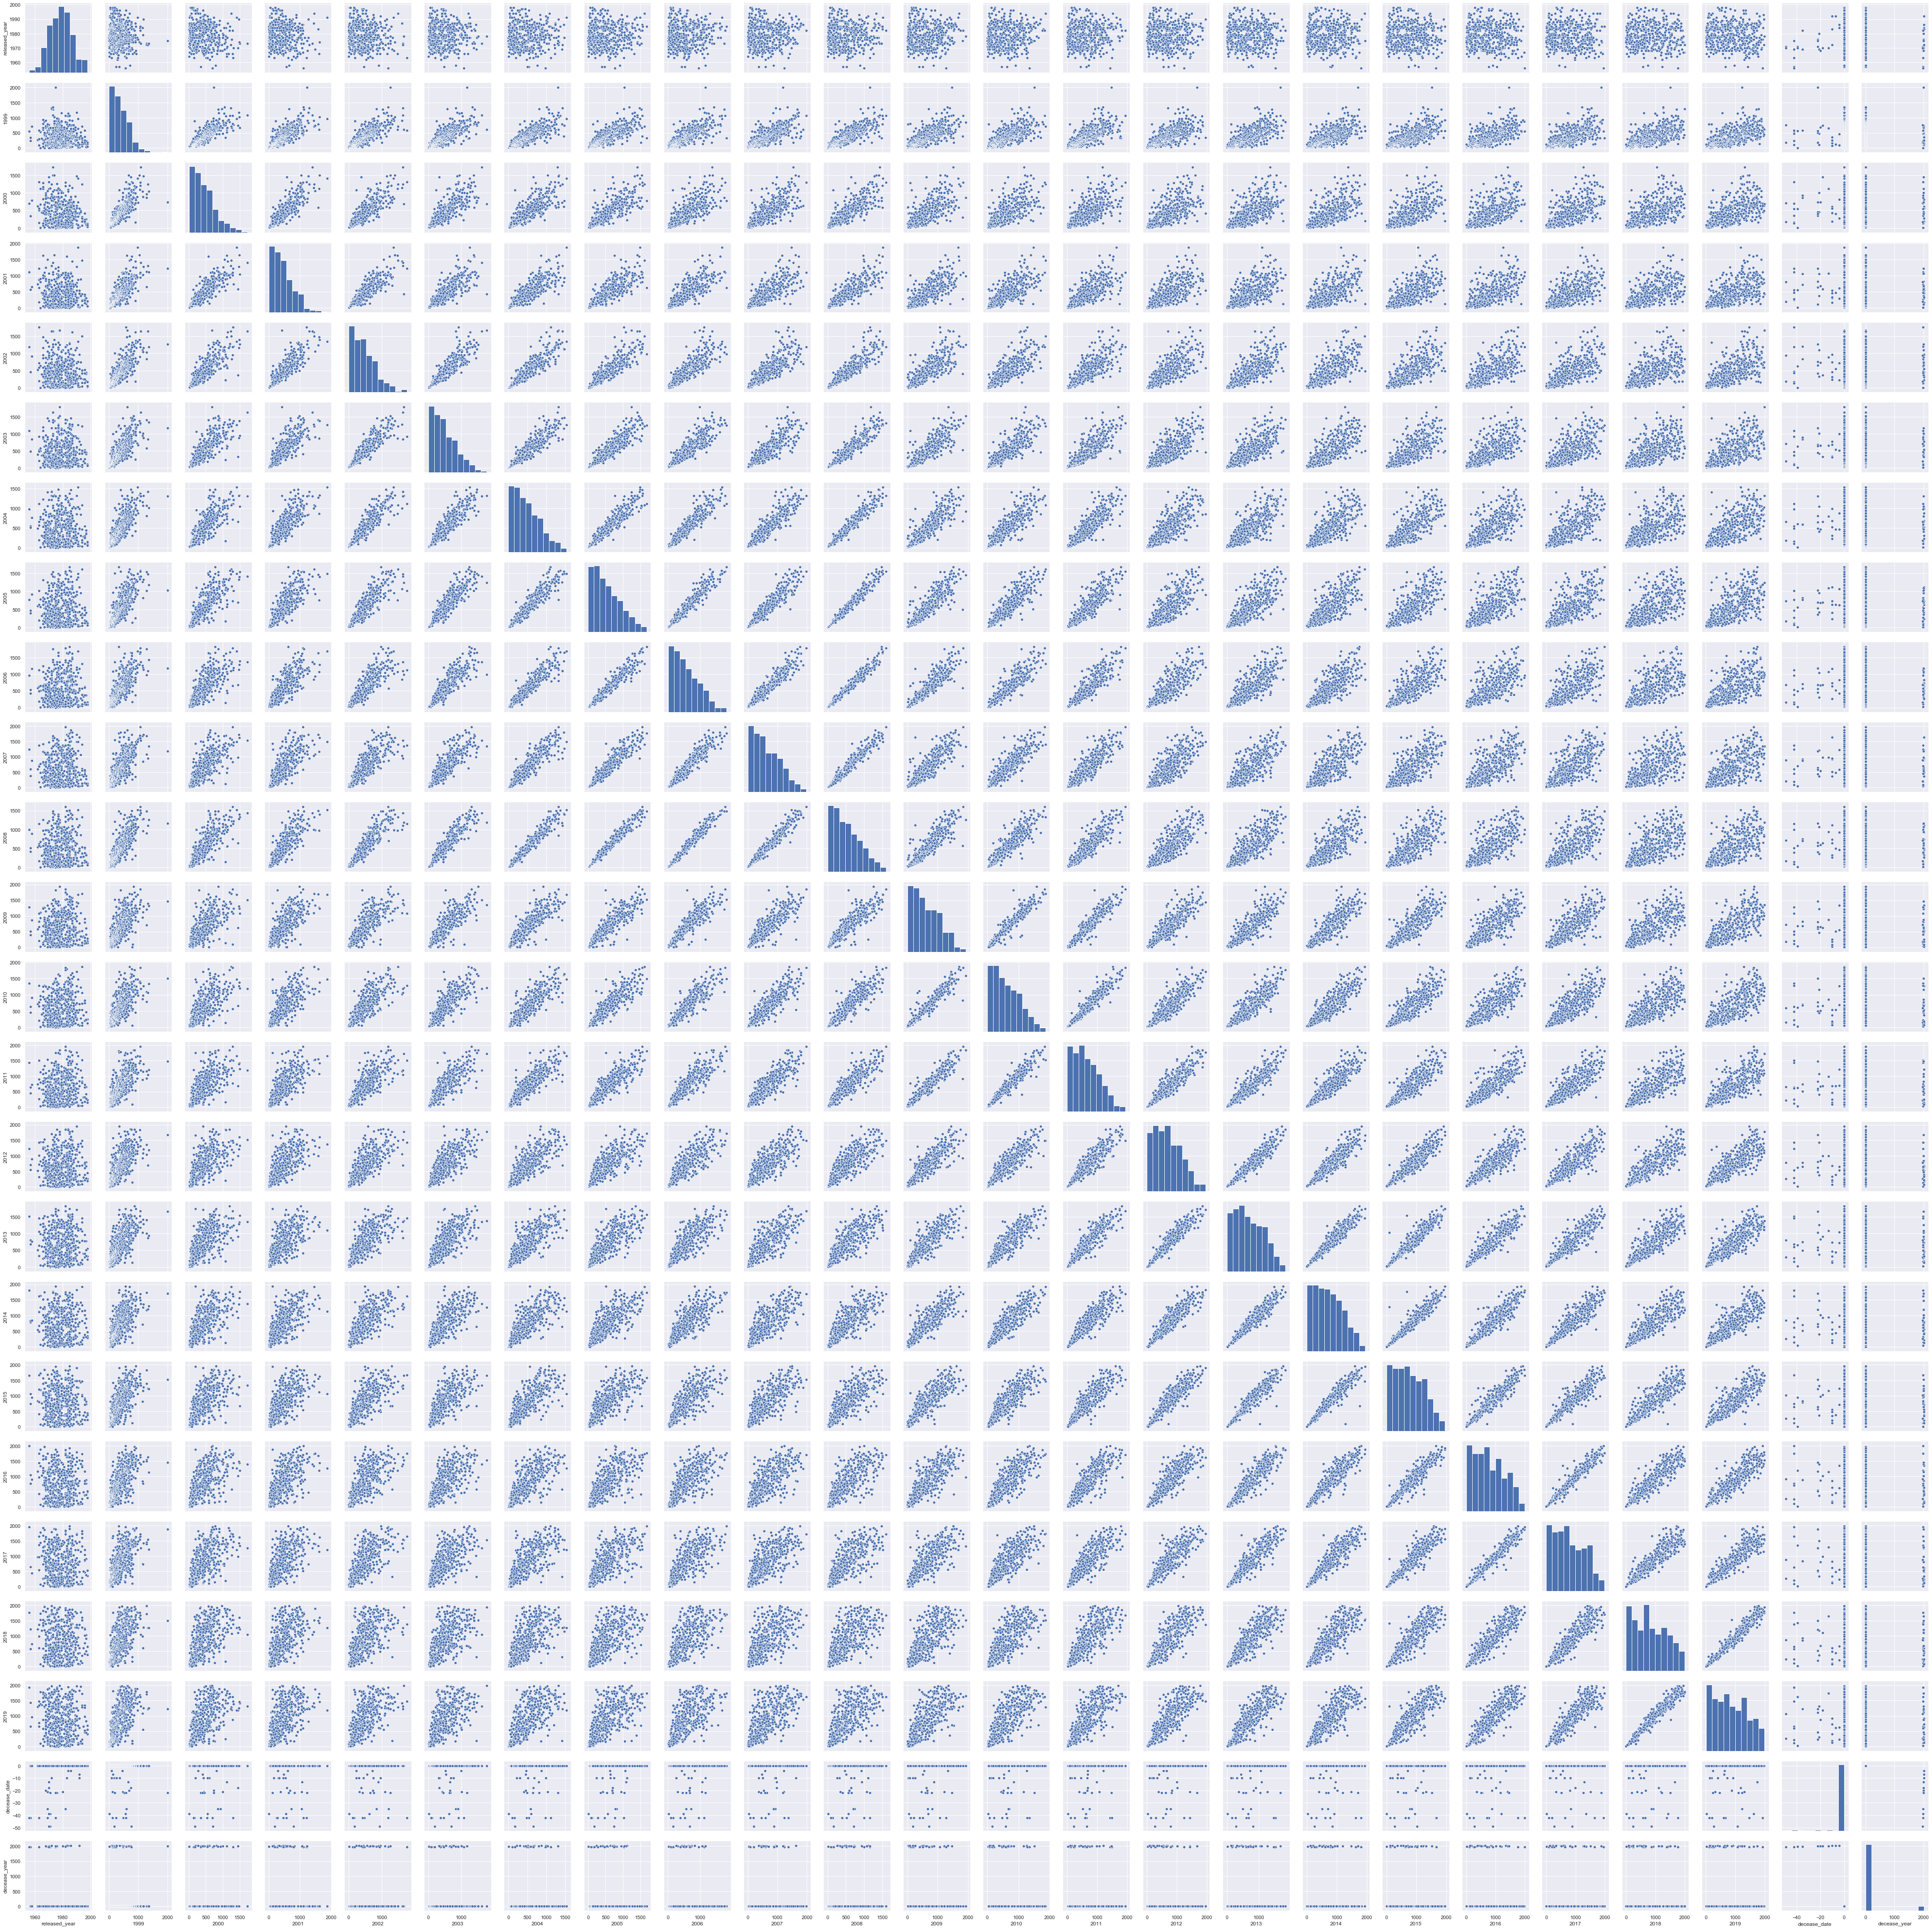

In [32]:
sns.pairplot(df)

# Method
This correlation pair plot show a linear relation when years draw closer together. This is however not linear enough to use multiple linear regression. Furthermore, linear regression assumes that all variables are independant, however in this case we are dealing with a clustering of time. This is because we work from the assumption that if you measure the ranking at one point in time (2017) it influences the measurement at another time (2018), in other words they are not independant. Due to these reasons, I chose to use a Random forest regression model.

### Random Forest Regression
To provide an answer to my hypothesis, I will be using the Random Forest algorithm. Random Forest can both be used for classification as regression. I will be using it for regression since it would otherwise be too many classes for a classification issue (namely 2000). A random forest exists of multiple _decision trees_ determining the final output rather than relying on individual decision trees. It is also robust against overfitting due to the law of Large Numbers (Breiman, 2002).

In [21]:
y = df['2019'] 
X = df[['2018', '2017', '2016', '2015','2014', '2013']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head()

2018  2017  2016  2015  2014  2013
164   934   910   897   890   770   625
98   1329  1192  1149   908   673  1225
295  1719  1471  1332  1442  1306  1178
420  1528  1288  1283  1088  1017   804
340  1872  1582  1653  1844  1639  1478

In [22]:
#n-estimator is number of trees, random state = 1 means seeded random 
model = RandomForestRegressor(n_estimators=99, random_state=1) #when using a max_depth = none, there will be infinite amount of branches on the trees
model = model.fit(X_train, y_train)

the best amount of trees for this forest was 99: both 98 and 100 affected the $r^2$ score negatively

# Evaluation of the model

In [34]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.9546320061406219

The $R^2$ is $0.95$, which means 95% of the variation in ranking of top 2000 in 2019, based on the test data set, is explained by the model. It could however still be over- or underfitting the data so to have a more trustworthy $R^2$ score, a 10-fold cross validation should be conducted (Gupta, 2017). This will split the complete data set 10 different times into a test and train dataset and will return an array of 10 seperate $R^2$ scores.

In [35]:
r2_scores = cross_val_score(model, X, y, cv=10)
r2_scores

array([0.94597018, 0.93675543, 0.91682447, 0.8720509 , 0.91820682,
       0.93028274, 0.91362076, 0.86965242, 0.89269013, 0.79599623])

To see how the model is doing generally over this 10-fold cross validation I calculate the mean.

In [36]:
#the mean of all made predictions that are in the list
r2_scores.mean()

0.8992050090325273

This $𝑅^2$ score is 0.90, lower than the previous $R^2$ but that can be explained. Overall it is still doing well. 

In [37]:
math.sqrt(mean_squared_error(y_test,y_predict))

124.64727872100241

The $RMSE$ is 125, which means the model is typically 125 in rankings off. This is actually relatively well, seen as it goes from 0 - 2000. 

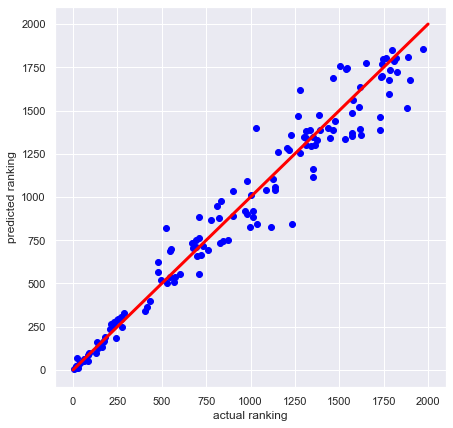

In [38]:
plt.scatter(y_test, y_predict, color='blue')
plt.plot([0, 2000], [0, 2000], color='red', lw=3)
plt.xlabel('actual ranking')
plt.ylabel('predicted ranking')
plt.show()

This plot shows that predictions are quite well when the song is higher in the top2000. However, the dots are further off the line as the line nears the 2000. 

We can conclude that the variation in predictions increases as the line draws closer to 2000.

### Predictive model vs 'stupid' model
To be able to make an estimation on how well the model is doing, we have to see how well it is doing compared to a 'stupid' model that would just calculate the means of the rows in the dataset. 

In [39]:
df_subset = df[cols]
df_subset['mean'] = round(df_subset.mean(axis = 1))
df_subset

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0       1     1     1     1     1     1     2     1     1     1     1     2   
1       2     4     3     3     2     2     3     3     3     2     2     1   
2       4     3     4     4     4     4     5     5     5     5     4     5   
3       5     5     5     5     5     6     6     7    10     6    12     9   
4       7     7    11    11    13     9    15    15    41    15    41    26   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
450  1283   869  1123  1034  1414  1064  1529  1758  1680  1478  1211  1091   
451  1286   970   649   842   583   808  1018   980  1086   898   706   785   
452  1325  1240  1299  1642   842  1420  1474  1100   945  1108  1390  1063   
453  1355  1047  1107  1186  1348  1013  1181  1430  1336  1262  1323  1334   
454  2000   737  1226  1262  1179  1303  1031  1174  1185  1161  1466  1512   

     2011  2012  2013  2014  2015  2016  2017  2018  2019    mean  
0       1     1     1     2     2     1     1     1     1     1.0  
1       2     2     2     1     3     2     2     2     2     2.0  
2       5     3     3     3     5     3     3     4     5     4.0  
3      11    19    22    17    30    27    27    29    35    14.0  
4      28    22    23    38     1    12    16    16    29    19.0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...     ...  
450  1151  1354  1399  1734  1835  1544  1458  1727  1714  1402.0  
451   921  1049   997  1177  1392  1504  1394  1988  1788  1087.0  
452  1040   698   862  1199  1232  1630  1544  1263  1227  1216.0  
453  1195  1195   934  1304  1228  1133  1224  1269  1252  1222.0  
454  1479  1675  1657  1704  1530  1460  1879  1499  1234  1398.0  

[455 rows x 22 columns]

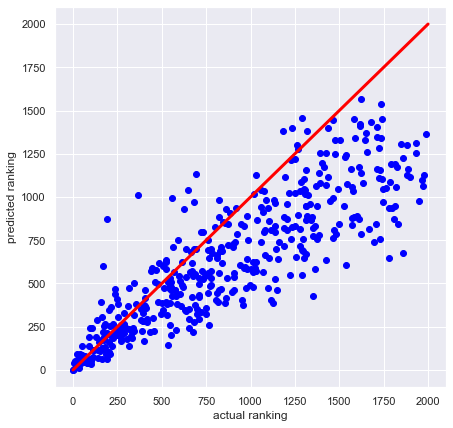

In [40]:
plt.scatter(df_subset['2019'], df_subset['mean'], color='blue')
plt.plot([0, 2000], [0, 2000], color='red', lw=3)
plt.xlabel('actual ranking')
plt.ylabel('predicted ranking')
plt.show()

The graph already indicates that this model is doing worse than the one using Random Forest Regression. However I would prefer comparing concrete values of the $R^2$ and the $RMSE$.

In [41]:
r2_score(df_subset['2019'],df_subset['mean'])

0.5504465263270082

This $𝑅^2$ score is 0.55, which means a little over half of the ranking can be explained by the estimations. It is doing very poorly compared to my model.

In [42]:
math.sqrt(mean_squared_error(df_subset['2019'],df_subset['mean']))

367.80874748335543

The $RMSE$ is 368, which means the mean estimation is typically 368 in rankings off.  

# Conclusion

Our model has an $R^2$ score that is 0.35 higher than the stupid model and less than half the RMSE which means we can conclude that are model is performing relatively well. 

###### references
Breiman, L. (2002). Manual on setting up, using, and understanding random forests 
    v3.1,https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf.
Gupta, P. (2017). Cross Validation in Machine Learning. _Medium towards data science_ https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f